# IMPORT LIBRARY

In [136]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# LOAD DATA

Sumber : https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [2]:
data = pd.read_csv("../Dataset/Heart_Disease_Prediction.csv")
data.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [3]:
def struktur_data(dt):
    print("Checking Struktur Data")
    print("========================")
    print("{} Baris".format(dt.shape[0]))
    print("{} Kolom".format(dt.shape[1]))

In [4]:
struktur_data(data)

Checking Struktur Data
270 Baris
14 Kolom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

# DATA PREPROCESSING

In [6]:
#Data Duplicated
def data_duplicated(X):
  dt_duplicated = X.duplicated().sum()
  if dt_duplicated == 0:
    print('Jumlah Data Duplicated : {}'.format(dt_duplicated))
  else:
    X.drop_duplicates(inplace = True)
    dt_duplicated1 = X.duplicated().sum()
    print('Jumlah Data Duplicated Sebelum Handling : {}'.format(dt_duplicated))
    print('Jumlah Data Duplicated Sesudah Handling : {}'.format(dt_duplicated1))
    
data_duplicated(data)

Jumlah Data Duplicated : 0


In [7]:
#Identifikasi Kolom
kolom1 = pd.DataFrame(data.nunique(), columns=['Total Kategori'])
kolom2 = pd.DataFrame(round((data.nunique()/data.shape[0])*100,2), columns=['%'])
result = pd.concat([kolom1, kolom2], axis=1, join='inner')
result

Total Kategori      %
Age                                  41  15.19
Sex                                   2   0.74
Chest pain type                       4   1.48
BP                                   47  17.41
Cholesterol                         144  53.33
FBS over 120                          2   0.74
EKG results                           3   1.11
Max HR                               90  33.33
Exercise angina                       2   0.74
ST depression                        39  14.44
Slope of ST                           3   1.11
Number of vessels fluro               4   1.48
Thallium                              3   1.11
Heart Disease                         2   0.74

In [8]:
#Data Missing
def data_missing(dt):
    hasil = pd.DataFrame(dt.isna().sum(), columns=['Total Data Missing'])
    return hasil

data_missing(data)

Total Data Missing
Age                                       0
Sex                                       0
Chest pain type                           0
BP                                        0
Cholesterol                               0
FBS over 120                              0
EKG results                               0
Max HR                                    0
Exercise angina                           0
ST depression                             0
Slope of ST                               0
Number of vessels fluro                   0
Thallium                                  0
Heart Disease                             0

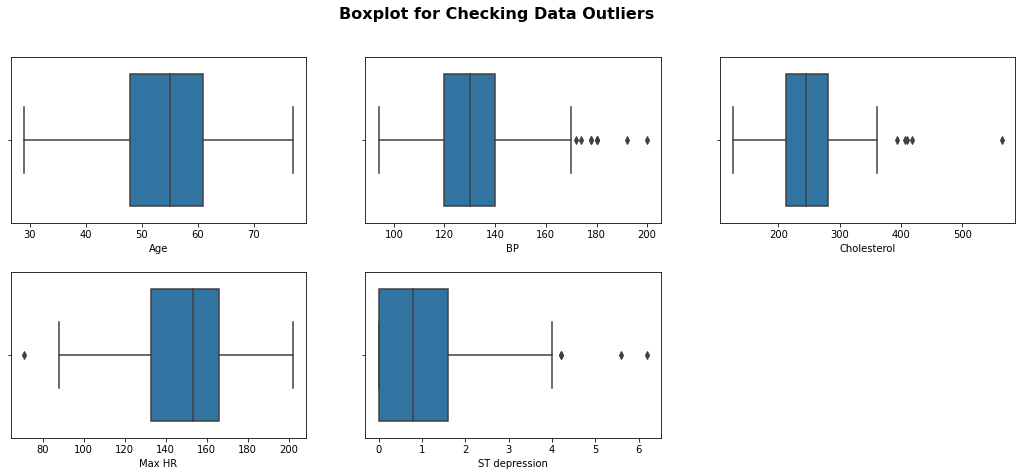

In [9]:
#Cek Outlier
def cekOutlier (X, k):
    col = X.columns
    n = len(col)
    b = (n//k)+1
    plt.figure(figsize=(18,7))
    plt.suptitle('Boxplot for Checking Data Outliers', fontsize = 16, fontweight = "bold")
    for i, kolom in enumerate(col):
        ax = plt.subplot(b, k, i+1)
        ax = plt.subplots_adjust(hspace = 0.3)
        sns.boxplot(data = X, x = kolom, ax = ax)
        
data1 = data[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']]
cekOutlier(data1, 3)

In [10]:
def HandlingOutlier(df, kolom):
    col = kolom
    for b, kolom in enumerate(col):
        for i in [kolom]:
            Q3, Q1 = np.quantile(df.loc[:,i], [0.75, 0.25])
            IQR = Q3 - Q1
            df.loc[df[i] < Q1 - 1.5*IQR, kolom] = np.nan
            df.loc[df[i] > Q3 + 1.5*IQR, kolom] = np.nan

data2 = data.copy()
HandlingOutlier(data2, data1.columns)
data_missing(data2)

Total Data Missing
Age                                       0
Sex                                       0
Chest pain type                           0
BP                                        9
Cholesterol                               5
FBS over 120                              0
EKG results                               0
Max HR                                    1
Exercise angina                           0
ST depression                             4
Slope of ST                               0
Number of vessels fluro                   0
Thallium                                  0
Heart Disease                             0

In [11]:
data2.dropna(axis = 0, inplace = True)
data_missing(data2)

Total Data Missing
Age                                       0
Sex                                       0
Chest pain type                           0
BP                                        0
Cholesterol                               0
FBS over 120                              0
EKG results                               0
Max HR                                    0
Exercise angina                           0
ST depression                             0
Slope of ST                               0
Number of vessels fluro                   0
Thallium                                  0
Heart Disease                             0

In [12]:
#Data dengan Outlier
data.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [13]:
struktur_data(data)

Checking Struktur Data
270 Baris
14 Kolom


In [14]:
#Data Tanpa Outlier
data2.reset_index(drop = True).head()

Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
0  70.0    1                4  130.0        322.0             0            2   
1  57.0    1                2  124.0        261.0             0            0   
2  64.0    1                4  128.0        263.0             0            0   
3  74.0    0                2  120.0        269.0             0            2   
4  65.0    1                4  120.0        177.0             0            0   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0   109.0                0            2.4            2   
1   141.0                0            0.3            1   
2   105.0                1            0.2            2   
3   121.0                1            0.2            1   
4   140.0                0            0.4            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7      Presence  
2                        1         7       Absence  
3                        1         3       Absence  
4                        0         7       Absence

In [15]:
struktur_data(data2)

Checking Struktur Data
252 Baris
14 Kolom


# EKSPLORASI DATA ANALISIS

In [155]:
#Statistik Deskriptif
data.describe().T

count        mean        std    min    25%    50%  \
Age                      270.0   54.433333   9.109067   29.0   48.0   55.0   
Sex                      270.0    0.677778   0.468195    0.0    0.0    1.0   
Chest pain type          270.0    3.174074   0.950090    1.0    3.0    3.0   
BP                       270.0  131.344444  17.861608   94.0  120.0  130.0   
Cholesterol              270.0  249.659259  51.686237  126.0  213.0  245.0   
FBS over 120             270.0    0.148148   0.355906    0.0    0.0    0.0   
EKG results              270.0    1.022222   0.997891    0.0    0.0    2.0   
Max HR                   270.0  149.677778  23.165717   71.0  133.0  153.5   
Exercise angina          270.0    0.329630   0.470952    0.0    0.0    0.0   
ST depression            270.0    1.050000   1.145210    0.0    0.0    0.8   
Slope of ST              270.0    1.585185   0.614390    1.0    1.0    2.0   
Number of vessels fluro  270.0    0.670370   0.943896    0.0    0.0    0.0   
Thallium                 270.0    4.696296   1.940659    3.0    3.0    3.0   
Heart Disease            270.0    0.444444   0.497827    0.0    0.0    0.0   

                           75%    max  
Age                       61.0   77.0  
Sex                        1.0    1.0  
Chest pain type            4.0    4.0  
BP                       140.0  200.0  
Cholesterol              280.0  564.0  
FBS over 120               0.0    1.0  
EKG results                2.0    2.0  
Max HR                   166.0  202.0  
Exercise angina            1.0    1.0  
ST depression              1.6    6.2  
Slope of ST                2.0    3.0  
Number of vessels fluro    1.0    3.0  
Thallium                   7.0    7.0  
Heart Disease              1.0    1.0

In [17]:
#Proporsi Target
plt.figure(figsize = (10, 8))
labels = ['Absence', 'Precence']
c=["g","r"]
plt.pie(data['Heart Disease'].value_counts(),
        autopct = '%1.1f%%',
        textprops = {'fontsize': 13},
        explode =(0.1, 0),
        labels = labels,
        shadow = True,
        colors = c
        )
plt.title(f'Distribusi Heart Disease \nn = {data.shape[0]}', fontsize = 15)
plt.ylabel('')
plt.show()

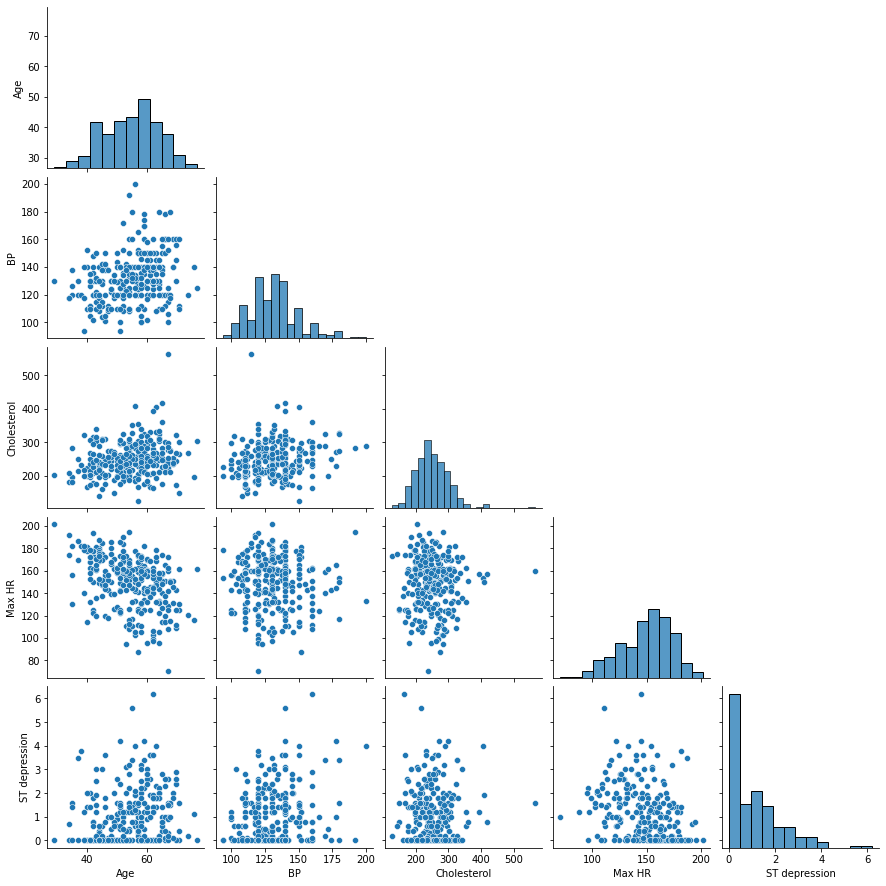

In [18]:
#Distribusi
g = sns.pairplot(data, 
                 vars=data1.columns,
                 kind='scatter',
                 diag_kind = 'hist')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

In [19]:
#Korelasi
le = LabelEncoder()
data3 = data.copy()
data3['Heart Disease'] = le.fit_transform(data3['Heart Disease'])
data3

plt.figure(figsize = (8,10))
sns.heatmap(data3.corr().round(2).sort_values('Heart Disease', ascending=False)[['Heart Disease']],annot=True)
plt.title('Koefisien Korelasi variabel Heart Disease dengan variabel lainnya \n', fontsize = 15)
plt.show()

Hanya variabel Thallium yang memiliki korelasi > 0.5. Selain itu terdapat variabel yang memiliki korelasi negatif yaitu FBS over 120 dan Max HR.

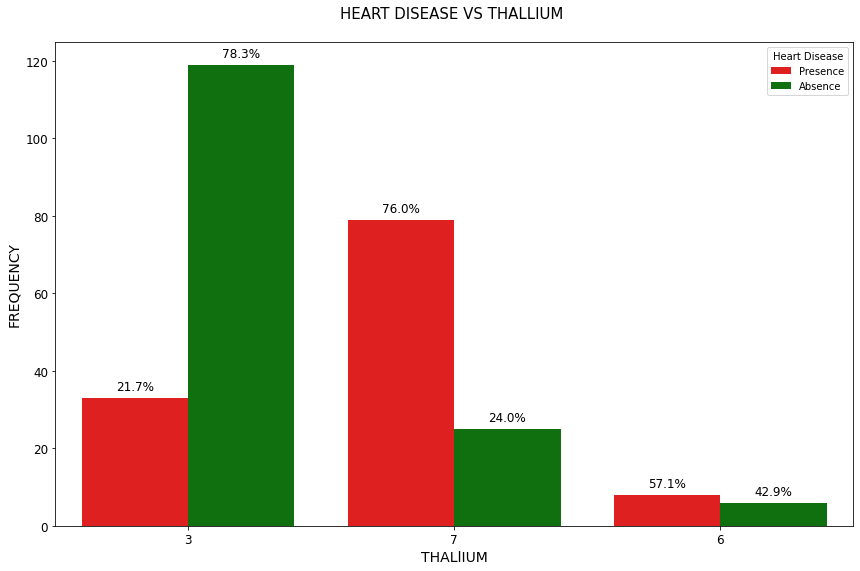

In [20]:
#Distribusi Thallium VS Heart Disease
c=["red","green"]
n_hues = data['Heart Disease'].unique().size
total = data['Thallium'].value_counts()

plt.figure(figsize = (12,8))
ax = sns.countplot(data['Thallium'], 
                   hue= data['Heart Disease'], 
                   order=total.index,
                   palette = c)
plt.title("HEART DISEASE VS THALLIUM \n",fontsize=15)
plt.xlabel("THALlIUM", fontsize = 14)
plt.ylabel("FREQUENCY", fontsize = 14)
plt.tight_layout()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

temp_totals = total.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{0:.1%}'.format(height/t),
            ha="center", fontsize=12)

Berdasarkan plot atas dapat kita simpulkan bahwa Thallium 3 menjadi pasien terbanyak dengan pasien diprediksi Absence dengan 78.3% total pasien Thallium 3. Selain itu untuk kategori pasien presence terbanyak pada pasien kategori Thallium 7.

In [21]:
#Transformasi Data
le = LabelEncoder()
#Data dengan Outlier
data['Heart Disease'] = le.fit_transform(data['Heart Disease'])
#Data tanpa Outlier
data2['Heart Disease'] = le.fit_transform(data2['Heart Disease'])

In [22]:
#Normalisasi
scaling = StandardScaler()

In [23]:
#Data dengan Outlier
X1 = data.drop('Heart Disease', axis = 1)
y1 = data['Heart Disease']
col1 = X1.columns
X_sc1 = pd.DataFrame(X1, columns = col1)
X_sc1[col1] = scaling.fit_transform(X1)
X_sc1.head()

Age       Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.712094  0.689500         0.870928 -0.075410     1.402212     -0.417029   
1  1.382140 -1.450327        -0.183559 -0.916759     6.093004     -0.417029   
2  0.282294  0.689500        -1.238045 -0.411950     0.219823     -0.417029   
3  1.052186  0.689500         0.870928 -0.187590     0.258589     -0.417029   
4  2.152032 -1.450327        -1.238045 -0.636310     0.374890     -0.417029   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0     0.981664 -1.759208        -0.701222       1.181012     0.676419   
1     0.981664  0.446409        -0.701222       0.481153     0.676419   
2    -1.026285 -0.375291        -0.701222      -0.656118    -0.954234   
3    -1.026285 -1.932198         1.426081      -0.743600     0.676419   
4     0.981664 -1.240239         1.426081      -0.743600    -0.954234   

   Number of vessels fluro  Thallium  
0                 2.472682 -0.875706  
1                -0.711535  1.189277  
2                -0.711535  1.189277  
3                 0.349871  1.189277  
4                 0.349871 -0.875706

In [24]:
#Data tanpa Outlier
X2 = data2.drop('Heart Disease', axis = 1).reset_index(drop = True)
y2 = data2['Heart Disease']
col2 = X2.columns
X_sc2 = pd.DataFrame(X2, columns = col2)
X_sc2[col2] = scaling.fit_transform(X2)
X_sc2.head()

Age       Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.741385  0.657129         0.892256  0.043865     1.740516      -0.40161   
1  0.323697  0.657129        -1.209131 -0.346278     0.353229      -0.40161   
2  1.087067  0.657129         0.892256 -0.086182     0.398714      -0.40161   
3  2.177597 -1.521772        -1.209131 -0.606373     0.535169      -0.40161   
4  1.196120  0.657129         0.892256 -0.606373    -1.557133      -0.40161   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0     0.990132 -1.797017        -0.681994       1.427777     0.742781   
1    -1.013991 -0.397447        -0.681994      -0.656580    -0.928477   
2    -1.013991 -1.971963         1.466288      -0.755836     0.742781   
3     0.990132 -1.272178         1.466288      -0.755836    -0.928477   
4    -1.013991 -0.441184        -0.681994      -0.557325    -0.928477   

   Number of vessels fluro  Thallium  
0                 2.553623 -0.846493  
1                -0.707422  1.234642  
2                 0.379593  1.234642  
3                 0.379593 -0.846493  
4                -0.707422  1.234642

In [105]:
#Spliting Data (80:20)
#Data dengan Outlier
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sc1, y1, test_size = 0.15, random_state = 42)
#Data tanpa Outlier
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sc2, y2, test_size = 0.15, random_state = 42)

# MODELING

In [124]:
parameters = {
    'C' : np.logspace(-2,6,9),
    'penalty' : ['l1', 'l2']
}

lg = LogisticRegression(random_state = 42, max_iter=10000)

In [125]:
def model(models, parameter, cv, Xtrain, ytrain):
    grid = GridSearchCV(models, parameter, n_jobs = 1, cv = cv).fit(Xtrain, ytrain)
    print("Tuned Parameters: {}".format(grid.best_params_))

In [126]:
#Dangan dengan Outlier
model(lg, parameters, 10, X_train1, y_train1)

Tuned Parameters: {'C': 0.01, 'penalty': 'l2'}


In [127]:
#Dangan tanpa Outlier
model(lg, parameters, 10, X_train2, y_train2)

Tuned Parameters: {'C': 1.0, 'penalty': 'l2'}


## EVALUASI MODEL

In [152]:
def evaluasi_model(model, Xtrain, ytrain, Xtest, ytest):
    model = model
    ypred = model.predict(Xtest)
    print("EVALUASI MODEL")
    print("=======================================================")
    print(classification_report(ytest, ypred))
    print("=======================================================")
    print('Training set score : {:.2f}'.format(model.score(Xtrain, ytrain)))
    print('Testing set score  : {:.2f}'.format(model.score(Xtest, ytest)))
    print("=======================================================")
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot = True)
    plt.title('Confusion Matrix\n n = {} \n'.format(Xtest.shape[0]), fontsize=12)
    plt.show()
    print("=======================================================")

EVALUASI MODEL
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.67      0.80        18

    accuracy                           0.85        41
   macro avg       0.90      0.83      0.84        41
weighted avg       0.88      0.85      0.85        41

Training set score : 0.86
Testing set score  : 0.85


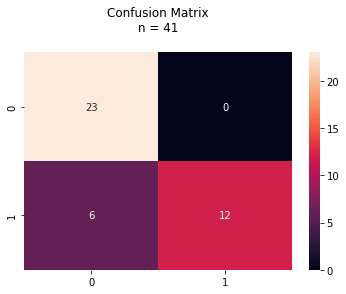

In [153]:
#Data dengan Outlier
model1 = LogisticRegression(C = 0.01, penalty = 'l2', random_state=42).fit(X_train1,y_train1)
evaluasi_model(model1, X_train1, y_train1, X_test1, y_test1)

In [154]:
#Data tanpa outlier
model2 = LogisticRegression(C = 1, penalty = 'l2', random_state=42).fit(X_train2,y_train2)
evaluasi_model(model2, X_train2, y_train2, X_test2, y_test2)

EVALUASI MODEL
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.88      0.88      0.88        16

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38

Training set score : 0.85
Testing set score  : 0.89
